### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
pip show matplotlib

Name: matplotlib
Version: 3.6.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: c:\users\hmshh\anaconda3\lib\site-packages
Requires: pyparsing, cycler, pillow, fonttools, kiwisolver, python-dateutil, contourpy, packaging, numpy
Required-by: seaborn, scikit-image
Note: you may need to restart the kernel to use updated packages.


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [10]:
data = pd.read_csv('data/coupons.csv')

In [11]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [13]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [14]:
data = data.drop(columns = 'car')
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [15]:
data['Y'].value_counts(normalize = True)[1]*100

56.93352098683666

 5. Use a bar plot to visualize the `coupon` column.

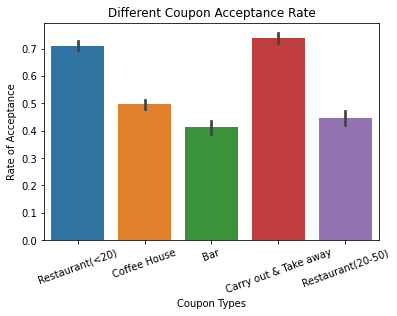

In [16]:
sns.barplot(data = data,x = 'coupon', y = 'Y')
plt.title("Different Coupon Acceptance Rate")
plt.xticks(rotation = 20)
plt.ylabel('Rate of Acceptance')
plt.xlabel('Coupon Types')
plt.show()

6. Use a histogram to visualize the temperature column.

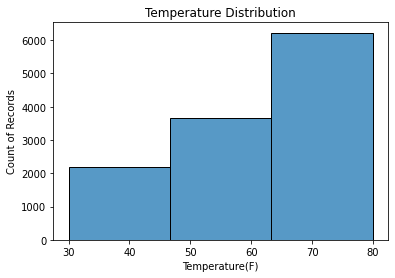

In [17]:
sns.histplot(data = data, x = 'temperature', bins = 3)
plt.title('Temperature Distribution')
plt.ylabel('Count of Records')
plt.xlabel('Temperature(F)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
df_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [19]:
df_bar['Y'].value_counts(normalize = True)[1]*100

41.19184526921067

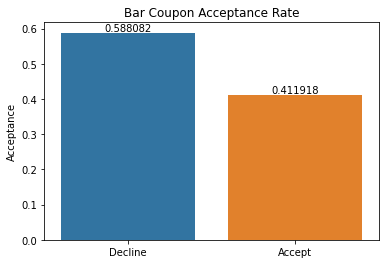

In [20]:
df1 = df_bar['Y'].value_counts(normalize = True).to_frame().reset_index()
df1.columns = ['Y','rate']
df1['Y'] = df1['Y'].replace([0,1],['Decline','Accept'])

ax = sns.barplot(data = df1,x = 'Y', y = 'rate')
plt.title('Bar Coupon Acceptance Rate')
plt.xlabel('')
plt.ylabel('Acceptance')
ax.bar_label(ax.containers[0])
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
#went to bar 3 or fewer times
df_bar.query('Bar == "never" or Bar =="less1" or Bar == "1~3"')['Y'].value_counts(normalize = True)[1]

0.37267441860465117

In [23]:
#went to bar more then 3 times
df_bar.query('Bar == "gt8" or Bar =="4~8" ')['Y'].value_counts(normalize = True)[1]

0.7616580310880829

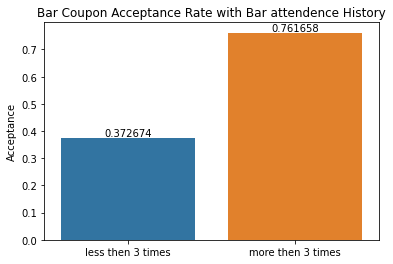

In [40]:
df2 = df_bar.query('Bar == "never" or Bar =="less1" or Bar == "1~3"')['Y'].value_counts(normalize = True).to_frame().reset_index()
df2.columns = ['Y','rate']
df2['Y'] = df2['Y'].replace([0,1],['<3Decline','less then 3 times'])

df3 = df_bar.query('Bar == "gt8" or Bar =="4~8" ')['Y'].value_counts(normalize = True).to_frame().reset_index()
df3.columns = ['Y','rate']
df3['Y'] = df3['Y'].replace([0,1],['>3Decline','more then 3 times'])

frames = [df2,df3]
df4 = pd.concat(frames)

ax1 = sns.barplot(data = df4.query('Y == "less then 3 times" or Y == "more then 3 times"'),x = 'Y', y = 'rate')
plt.title('Bar Coupon Acceptance Rate with Bar attendence History')
plt.xlabel('')
plt.ylabel('Acceptance')
ax1.bar_label(ax1.containers[0])
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:
#Acceptance Rate of drivers who go to a bar more than once a month and over the age of 25
age_25_above = ['26','31','36','41','50plus']
bar_1_above = ['1~3','4~8','gt8']
df_bar[df_bar['Bar'].isin(bar_1_above) & df_bar['age'].isin(age_25_above)]['Y'].value_counts(normalize = True)[1]

0.6873385012919897

In [26]:
#Acceptance of others
df_bar.query('Bar not in@bar_1_above or age not in@age_25_above')['Y'].value_counts(normalize = True)[1]

0.3420707732634338

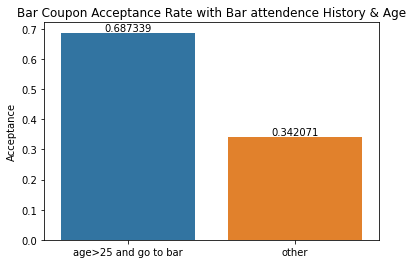

In [41]:
df5 = df_bar[df_bar['Bar'].isin(bar_1_above) & df_bar['age'].isin(age_25_above)]['Y'].value_counts(normalize = True).to_frame().reset_index()
df5.columns = ['Y','rate']
df5['Y'] = df5['Y'].replace([0,1],['Decline','age>25 and go to bar'])

df6 =df_bar.query('Bar not in@bar_1_above or age not in@age_25_above')['Y'].value_counts(normalize = True).to_frame().reset_index()
df6.columns = ['Y','rate']
df6['Y'] = df6['Y'].replace([0,1],['Decline','other'])

frames1 = [df5,df6]
df7 = pd.concat(frames1)

ax2 = sns.barplot(data = df7.query('Y == "age>25 and go to bar" or Y == "other"'),x = 'Y', y = 'rate')
plt.title('Bar Coupon Acceptance Rate with Bar attendence History & Age')
plt.xlabel('')
plt.ylabel('Acceptance')
ax2.bar_label(ax2.containers[0])
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [48]:
p_kid = ['Kid(s)']
p_occupation = ['Farming Fishing & Forestry']

## qualified
df_bar.query('Bar in@bar_1_above and passanger not in@p_kid and occupation not in@p_occupation')['Y'].value_counts(normalize = True)[1]

0.7094339622641509

In [54]:
## other
df_bar.query('Bar in@bar_1_above and (passanger in@p_kid or occupation in@p_occupation)')['Y'].value_counts(normalize = True)[1]

0.38095238095238093

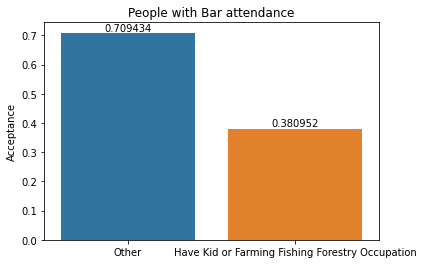

In [59]:
df8 = df_bar.query('Bar in@bar_1_above and passanger not in@p_kid and occupation not in@p_occupation')['Y'].value_counts(normalize = True).to_frame().reset_index()
df8.columns = ['Y','rate']
df8['Y'] = df8['Y'].replace([0,1],['Decline','Other'])

df9 = df_bar.query('Bar in@bar_1_above and (passanger in@p_kid or occupation in@p_occupation)')['Y'].value_counts(normalize = True).to_frame().reset_index()
df9.columns = ['Y','rate']
df9['Y'] = df9['Y'].replace([0,1],['Decline','Have Kid or Farming Fishing Forestry Occupation'])

frames2 = [df8,df9]
df10 = pd.concat(frames2)

ax3 = sns.barplot(data = df10.query('Y == "Other" or Y == "Have Kid or Farming Fishing Forestry Occupation"'),x = 'Y', y = 'rate')
plt.title('People with Bar attendance')
plt.xlabel('')
plt.ylabel('Acceptance')
ax3.bar_label(ax3.containers[0])
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [72]:
df_bar['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [68]:
## go to bars more than once a month, had passengers that were not a kid, and were not widowed 
df_bar.query('Bar in@bar_1_above and passanger != "Kid(s)" and maritalStatus != "Widowed"')['Y'].value_counts(normalize = True)[1]

0.7094339622641509

In [70]:
## go to bars more than once a month and are under the age of 30
age_under_30 = ['below21','21','26']
df_bar.query('Bar in@bar_1_above and age in @age_under_30')['Y'].value_counts(normalize = True)[1]

0.7195121951219512

In [73]:
## go to cheap restaurants more than 4 times a month and income is less than 50K. 
cheap_res = ['4~8','gt8']
income_less_50K = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']
df_bar.query('RestaurantLessThan20 in @cheap_res and income in @income_less_50K')['Y'].value_counts(normalize = True)[1]

0.45645645645645644

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers' acceptance towards bar coupon primarly depends on whether they went to bar on a frequent basis. From the observation, drivers aged more than 25 and went to the bar more than 3 times a month are far more likely to accept a bar coupon then drivers who didn't go to bar that often. The passanger in the car and the driver's income can also effect the driver's behavior. For drivers that had kids in the car, the acceptance rate drop significantly. The same happend for drivers that have lower income. As a result, to increase the rate of acceptance for a bar coupon, we should target drivers aged 25 and above, who would go to a bar more than three times a month, have a higher income and don't have a kid at the time the coupon is sent. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [74]:
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [75]:
df_ch = data.query('coupon == "Coffee House"')

Overall acceptance rate of Coffee House Coupon

In [77]:
df_ch['Y'].value_counts(normalize = True)

0    0.503669
1    0.496331
Name: Y, dtype: float64

Check if weather effects coupon acceptance

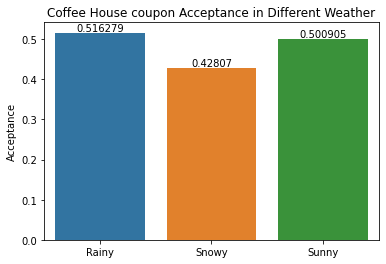

In [103]:
ch1 = df_ch.groupby('weather')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'rate'}).reset_index()

cx1 = sns.barplot(data = ch1.query('Y == "1"'),x = 'weather', y = 'rate')
plt.title('Coffee House coupon Acceptance in Different Weather')
plt.xlabel('')
plt.ylabel('Acceptance')
cx1.bar_label(cx1.containers[0])
plt.show()

Result: No big difference between weather for coupon acceptance

The Impact of Marrital Status

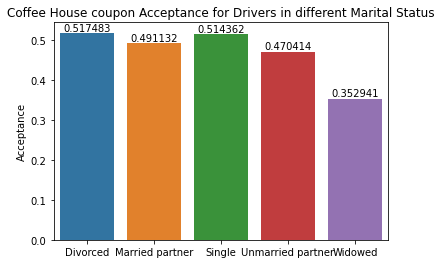

In [107]:
ch2 = df_ch.groupby('maritalStatus')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'rate'}).reset_index()

cx2 = sns.barplot(data = ch2.query('Y == "1"'),x = 'maritalStatus', y = 'rate')
plt.title('Coffee House coupon Acceptance for Drivers in different Marital Status')
plt.xlabel('')
plt.ylabel('Acceptance')
cx2.bar_label(cx2.containers[0])
plt.show()

Result: Widowed driver are less likely to accept a coffee house coupon

Number of times drivers go to a coffee house

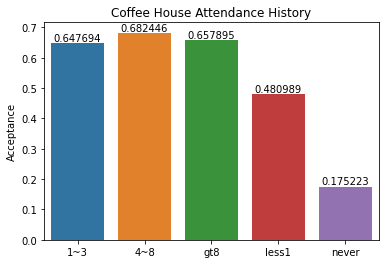

In [109]:
ch3 = df_ch.groupby('CoffeeHouse')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'rate'}).reset_index()

cx3 = sns.barplot(data = ch3.query('Y == "1"'),x = 'CoffeeHouse', y = 'rate')
plt.title('Coffee House Attendance History')
plt.xlabel('')
plt.ylabel('Acceptance')
cx3.bar_label(cx3.containers[0])
plt.show()

Result: Driver that have go to a coffee house more than 3 times a month are more likely to accept a coupon

Age of the driver

In [113]:
 df_ch.groupby('age')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'Rate'}).reset_index().query('Y == "1"')

,age,Y,Rate
0,21,1,0.517773
2,26,1,0.513174
5,31,1,0.483816
7,36,1,0.468586
9,41,1,0.492114
10,46,1,0.506912
13,50plus,1,0.419660
14,below21,1,0.678322


Result: Young drivers who are below 21 years old are more likely to accept a coffee house coupon where older people above 50 are less likely to accept the coupon

Occupation of the driver

In [117]:
df_ch.query('age == "below21"')['occupation'].value_counts()

Student                               119
Unemployed                             11
Healthcare Support                      6
Food Preparation & Serving Related      4
Education&Training&Library              3
Name: occupation, dtype: int64

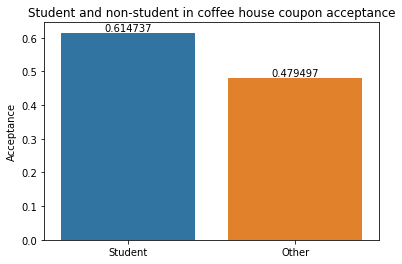

In [126]:
ch4 = df_ch.query('occupation == "Student"')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'rate'}).reset_index()
ch4.columns = ['Y','rate']

ch5 = df_ch.query('occupation != "Student"')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'rate'}).reset_index()
ch5.columns = ['Y','rate']

ch4['Y'] = ch4['Y'].replace([0,1],['Decline','Student'])
ch5['Y'] = ch5['Y'].replace([0,1],['Decline','Other'])

frames4 = [ch4,ch5]
ch5 = pd.concat(frames4)

cx4 = sns.barplot(data = ch5.query('Y == "Student" or Y == "Other"'),x = 'Y', y = 'rate')
plt.title('Student and non-student in coffee house coupon acceptance')
plt.xlabel('')
plt.ylabel('Acceptance')
cx4.bar_label(cx4.containers[0])
plt.show()

Result: as an additional analysis based on age, drivers below 21 are mostly student, which confirmed to have a higher acceptance rate for coffee house coupon

The expiration time

In [128]:
df_ch.groupby('expiration')['Y'].value_counts(normalize = True).to_frame().rename(columns = {'Y':'Rate'}).reset_index().query('Y == "1"')

,expiration,Y,Rate
0,1d,1,0.580626
3,2h,1,0.429110


Result: expiration time doesn't affect much of the acceptance rate, but the longer the better

#### Final Result 

Based on the current acceptance behavior of coffee house coupon, we can see that drivers' age and past coffee house attendance are the two big factor that determine the acceptance of coffee house coupon. In general, drivers below 21, who are mostly student, have a higher change to accept the coffee house coupon, and the acceptance rate decrease when the age goes higher, with the lower accpetance rate we've seen in the above 50 group. Drivers who love to go to coffee house in the past are better target than drivers who have less interest. Other environmental factors like weather, driving direction etc are not very significant in effecting the acceptance rate. 

So to prompt the use of coffee house coupon, we recommend targeting drivers who are below 21 and who have a history of going to a coffee house more than 3 times a month. It is also recommended to give a one-day long coupon than a short 2 hour coupon to increase the chance of driver using the coupon. 